In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
## 1. Data Loading

In [5]:
df = pd.read_csv("../data/raw/titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
## 2. Basic Overview

In [6]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
## 3. Fare Distribution

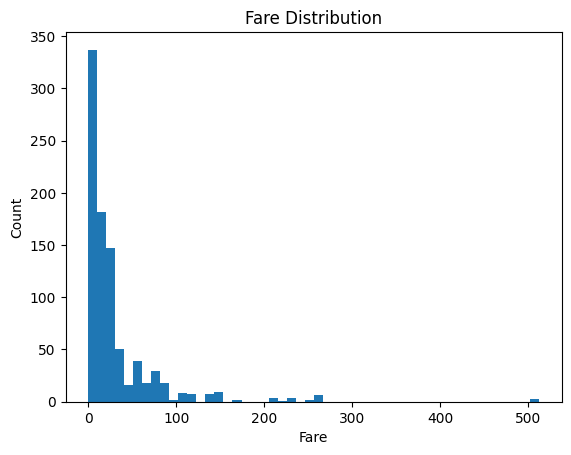

In [13]:
plt.figure()
plt.hist(df["Fare"], bins=50)
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Fare Distribution")
plt.show()

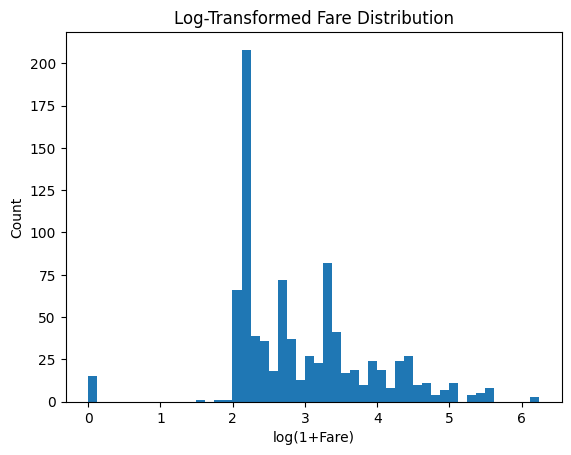

In [9]:
log_fare = np.log1p(df["Fare"])

plt.figure()
plt.hist(log_fare, bins=50)
plt.xlabel("log(1+Fare)")
plt.ylabel("Count")
plt.title("Log-Transformed Fare Distribution")
plt.show()

Applying a $\log$ transform to Fare results in a more symmetric distribution.

In [19]:
## 4. Missing Data Analysis

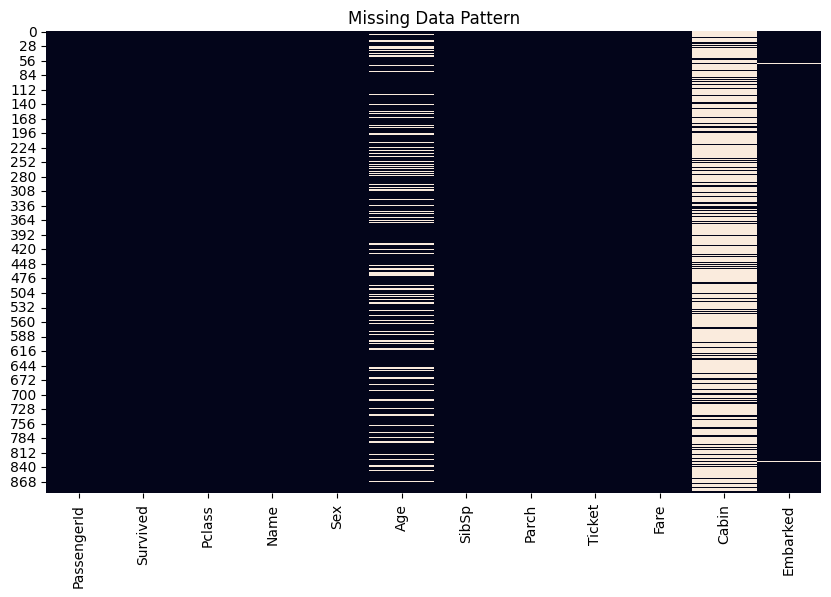

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Pattern")
plt.show()


The columns Age, Cabin, and Embarked are missing data. We fill in the missing Age data with the overall median, we shall drop the Cabin column. Since almost no data is missing for Embarked, we shall drop the two rows with missing Embarked data.